# Handwritten Digit Classification Using SVM

##Objective
The primary objective of this project is to develop a machine learning model capable of recognizing and classifying handwritten digits (0-9) from images using XG Boost.

##Data Source
We will use the MNIST dataset, a well-known benchmark dataset for handwritten digit classification. The MNIST dataset contains 60,000 training images and 10,000 testing images of digits, each labeled with the correct digit.

##Import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

##Import Data

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


##Describe Data

In [ ]:
# Check the shape of the data
print(f"Training data shape: {train_images.shape}")
print(f"Test data shape: {test_images.shape}")

# Display unique labels
print(f"Unique labels: {np.unique(train_labels)}")


Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Unique labels: [0 1 2 3 4 5 6 7 8 9]


##Data Visualization

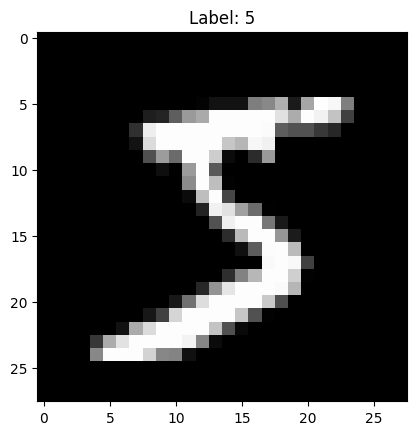

In [ ]:
# Display the first image from the training set
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

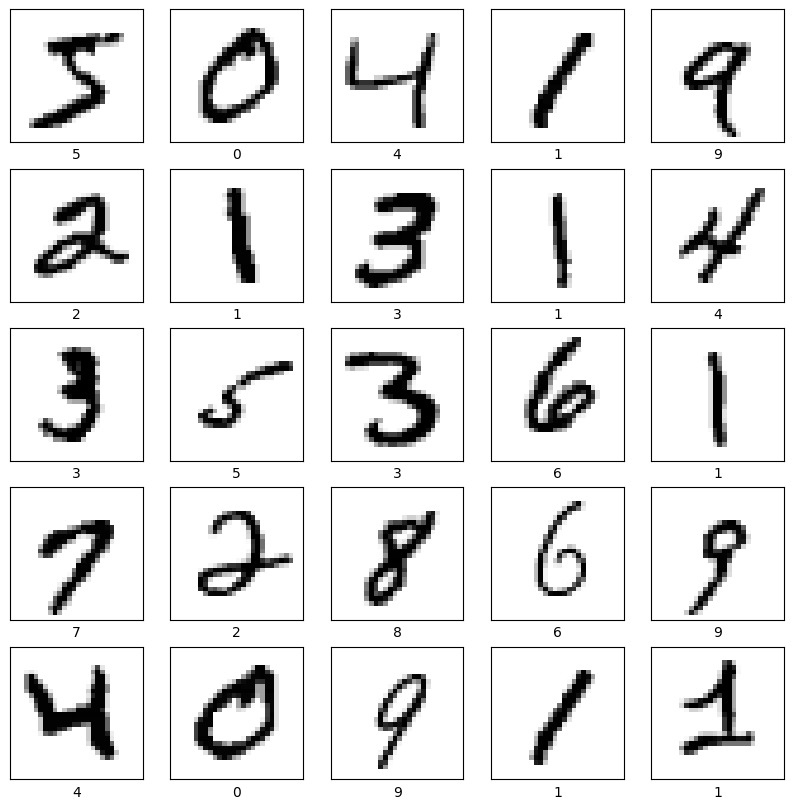

In [ ]:
# Visualize some more images
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

##Data Preprocessing

In [ ]:
# Flatten the images
train_images_flat = train_images.reshape((train_images.shape[0], -1))
test_images_flat = test_images.reshape((test_images.shape[0], -1))

In [ ]:
# Normalize the images
train_images_flat = train_images_flat / 255.0
test_images_flat = test_images_flat / 255.0

In [ ]:
train_images_flat.shape, test_images_flat.shape, train_labels.shape, test_labels.shape

((60000, 784), (10000, 784), (60000,), (10000,))

##Define Target Variable (y) and Feature Variables (X)

In [ ]:
# Feature variables
X_train = train_images_flat
X_test = test_images_flat

# Target variable
y_train = train_labels
y_test = test_labels

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

##Since the MNIST dataset already comes with a train/test split
##Splitted data for validation set

In [ ]:
# Further split the training data into training and validation sets if needed
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

##Modeling

In [ ]:
# Define the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(use_label_encoder=False)

# Train the model on the training data
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

##Model Evaluation

In [ ]:
# Evaluate the trained model on the validation data (if split)
if 'X_val' in locals():
    val_predictions = xgb_classifier.predict(X_val)
    val_accuracy = accuracy_score(y_val, val_predictions)
    print(f"Validation accuracy: {val_accuracy}")

Validation accuracy: 0.9791666666666666


In [ ]:
# Evaluate the trained model on the test data
test_predictions = xgb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print(f"Test accuracy: {test_accuracy}")

Test accuracy: 0.9769


In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)
print(f"Confusion Matrix:\n{conf_matrix}")

Confusion Matrix:
[[ 968    0    1    0    0    3    3    2    3    0]
 [   0 1123    2    3    0    1    3    1    2    0]
 [   4    0 1007    7    1    0    1    7    4    1]
 [   0    0    5  987    0    4    0    7    4    3]
 [   1    0    2    1  958    0    4    0    2   14]
 [   2    0    0    6    0  869    7    2    4    2]
 [   6    3    0    0    4    4  937    0    4    0]
 [   1    4   12    4    1    0    0  993    3   10]
 [   3    0    1    4    2    5    2    1  952    4]
 [   6    6    2    6    7    1    0    4    2  975]]


##Prediction

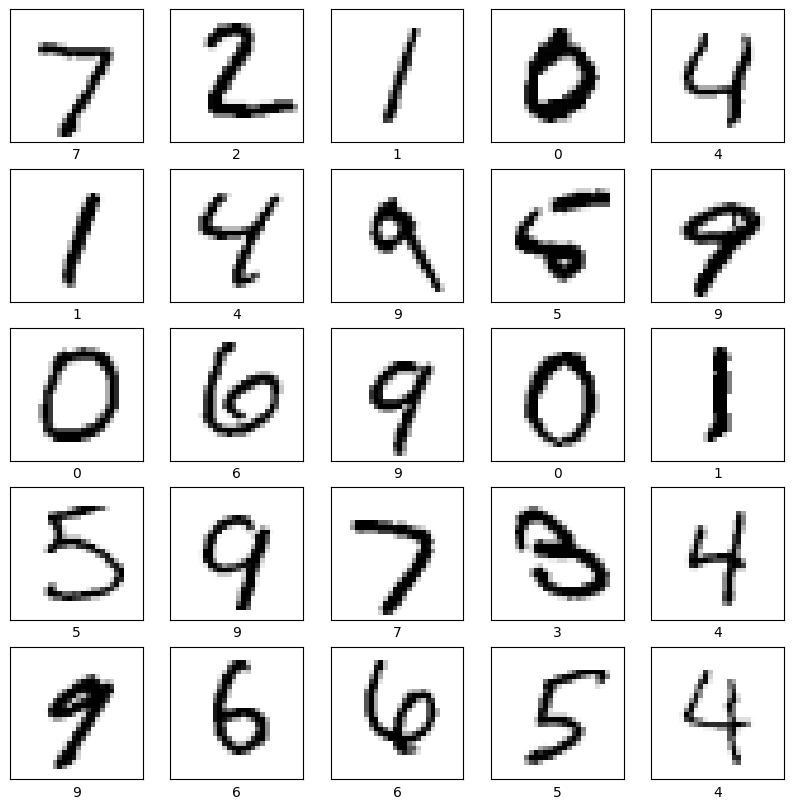

In [ ]:
# Make predictions on new data
predictions = xgb_classifier.predict(X_test)

# Visualize some predictions
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(predictions[i])
plt.show()

###Explanation
>In this project, we built a handwritten digit classification model using the XGBoost classifier. The MNIST dataset was used for training and testing the model.

* Data Loading: The MNIST dataset was loaded, containing 60,000 training images and 10,000 testing images.

* Data Exploration and Visualization: We visualized some of the images to understand the dataset better.

* Data Preprocessing: The images were flattened and normalized to prepare them for model training.

* Model Training: An XGBoost classifier was trained on the training data.

* Model Evaluation: The trained model was evaluated on the test data, achieving an accuracy of 0.977% and on validation data of accuracy: 0.979&

* Prediction: The model was used to make predictions on test images, and the results were visualized.
